# Sine wave example using isolation forests

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import IsolationForest
import sklearn.metrics as met

import rrcf
from rrcf.shingle import shingle

## Generate and shingle data

In [2]:
n = 730
A = 50
center = 100
phi = 30
T = 2*np.pi/100
t = np.arange(n)
sin = A*np.sin(T*t-phi*T) + center
sin[235:255] = 80

labels = np.zeros(len(sin))
labels[235:255] = 1

In [3]:
parmas = {"trees"      : 100}
data_dim = 4
data_index = []

data_stream = shingle(sin, data_dim)
sin_shingle = np.asarray(next(data_stream))
for i in range(1,len(sin)-data_dim+1):
    sin_shingle = np.vstack((sin_shingle, next(data_stream)))

## Establish and run IF algorithm

In [4]:
def runIF(sample_size):
    IF = IsolationForest(n_estimators = parmas["trees"],
                    max_samples = sample_size,
                    contamination = 'auto',
                    behaviour = 'new',
                    random_state = 42)
    sample = np.random.choice(len(sin_shingle),sample_size)
    IF.fit(sin_shingle[sample,:])
    
    if_perf = IF.fit_predict(sin_shingle)
    if_perf[if_perf < 0] = 0
    
    # Compute performance metrics
    tn, fp, fn, tp = met.confusion_matrix(labels[data_dim-1:], if_perf).ravel()
    ppv = tp /(tp + fp)
    precall = tp /(tp + fn)
    
    npv = tn /(tn + fn)
    nrecall = tn /(tn + fp)
    
    acc = (tp + tn) / (tp+tn+fp+fn)
    
    print('IF, Sample size: ' + str(sample_size))
    print("Positive Precision:", ppv)
    print("Positive Recall   :", precall)
    print("Negative Precision:", npv)
    print("Negative Recall   :", nrecall)
    print("Accuracy          :", acc)
    print()
    
    # Color detected anomalies in red
    colors = np.array(['#000000', '#ff0000'])
    plt.scatter(np.linspace(0,len(sin)-1,len(sin)),sin, s=10, color=colors[if_perf])
    plt.show()
    
    return if_perf

IF, Sample size: 256
Positive Precision: 0.425
Positive Recall   : 0.85
Negative Precision: 0.9956331877729258
Negative Recall   : 0.9674681753889675
Accuracy          : 0.9642365887207703



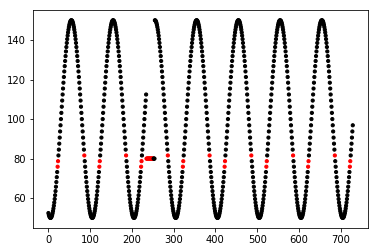

In [5]:
if_perf = runIF(256)

IF, Sample size: 512
Positive Precision: 0.14655172413793102
Positive Recall   : 0.85
Negative Precision: 0.9950900163666121
Negative Recall   : 0.85997171145686
Accuracy          : 0.859697386519945



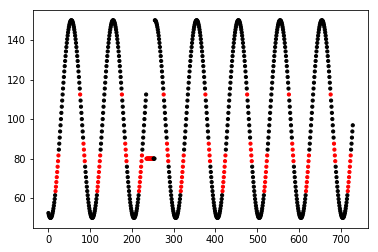

In [6]:
if_perf = runIF(512)